In [33]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("AI_Impact_on_Jobs_2030.csv")

df.head(31)

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42
5,AI Engineer,92592,11,Master's,0.29,0.51,0.10,Low,0.71,0.79,0.61,0.93,0.65,0.91,0.85,0.45,0.10,0.37
6,Mechanic,107373,23,PhD,0.67,1.09,0.41,Medium,0.56,0.38,0.97,0.85,0.72,0.24,0.26,0.04,0.71,0.11
7,Teacher,53419,12,High School,0.20,1.40,0.17,Low,0.56,0.70,0.14,0.60,0.54,0.20,0.94,0.60,0.69,0.88
8,HR Specialist,139225,12,Master's,0.30,0.61,0.48,Medium,0.22,0.42,0.88,0.32,0.12,0.36,0.91,0.27,0.65,0.00
9,Customer Support,85016,2,High School,0.01,1.01,0.80,High,0.22,0.12,0.34,0.94,0.32,0.52,0.70,0.36,0.97,0.96


In [2]:
df.shape

(3000, 18)

## What we noticed at first.

Alot of stationary jobs that dont require as much heavy duty work quickly will be taken up by AI. So jobs like customer support, HR specialist ,even normal retail workers have chances at getting there jobs taken by AI in the near future.


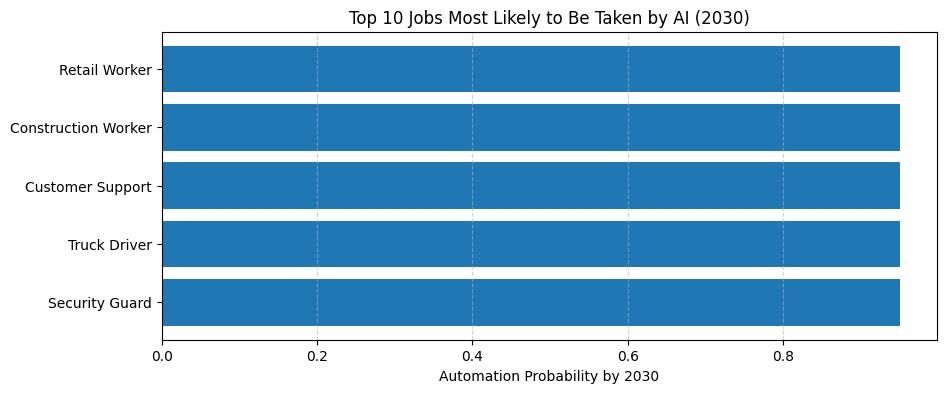

In [8]:
df_sorted = df.sort_values(by="Automation_Probability_2030", ascending=False)


top_risk_jobs = df_sorted.head(11)


plt.figure(figsize=(10,4))
plt.barh(top_risk_jobs["Job_Title"], top_risk_jobs["Automation_Probability_2030"])
plt.xlabel("Automation Probability by 2030")
plt.title("Top 10 Jobs Most Likely to Be Taken by AI (2030)")
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.6)

plt.show()


## Next we decided too look at jobs taken by certain education level.

More jobs can be taken with lower education,then higher. Although results can be a little different depending on the different jobs.

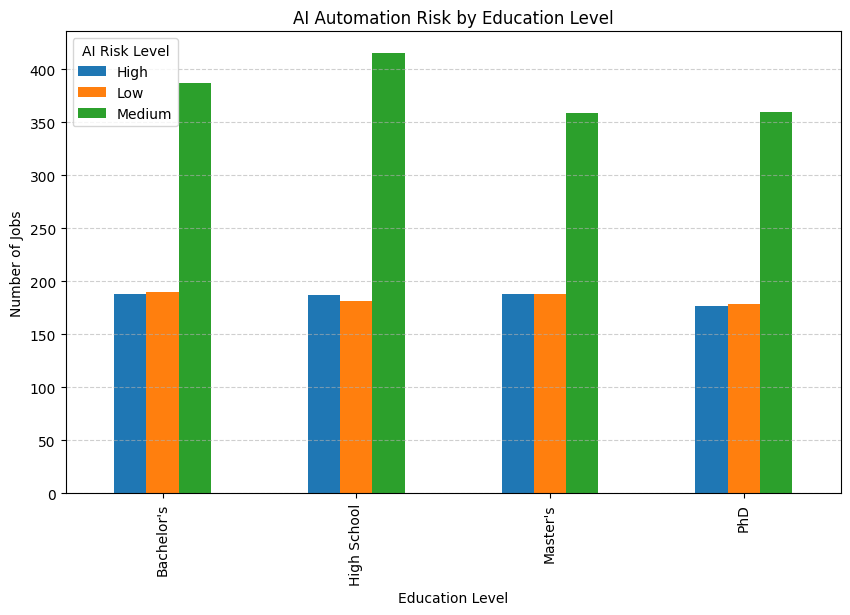

In [9]:
edu_risk_counts = df.groupby(["Education_Level", "Risk_Category"]).size().unstack(fill_value=0)

edu_risk_counts.plot(kind="bar", figsize=(10,6))

plt.title("AI Automation Risk by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Number of Jobs")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend(title="AI Risk Level")

plt.show()


## Next we decided too compare salaries for jobs taken by AI.

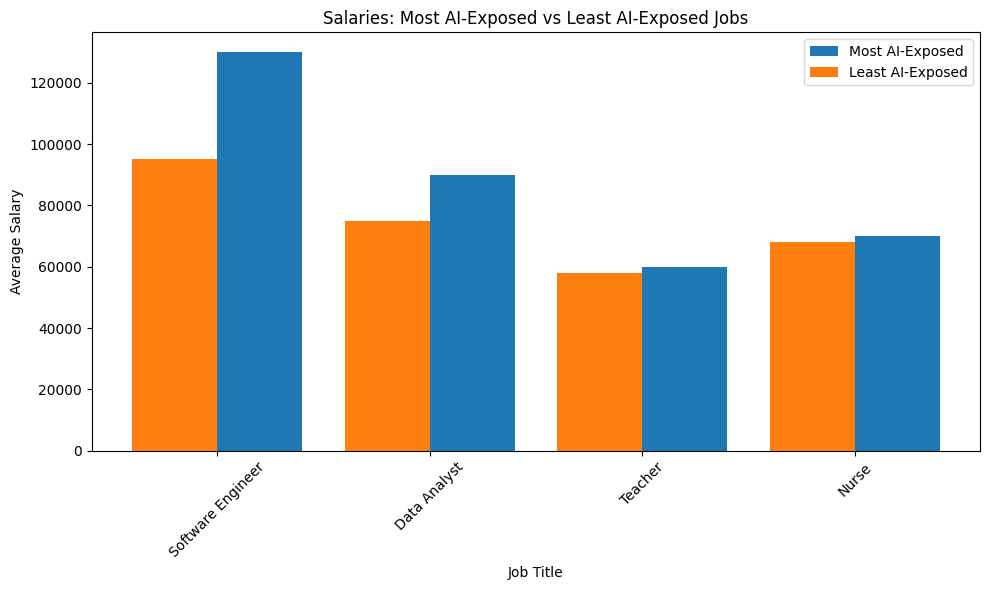

In [11]:
data = {
"Job Title": ["Software Engineer", "Data Analyst", "Teacher", "Nurse"],
"Most AI-Exposed Salary": [130000, 90000, 60000, 70000],
"Least AI-Exposed Salary": [95000, 75000, 58000, 68000]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))

x = range(len(df))

plt.bar(x, df["Most AI-Exposed Salary"], width=0.4, label="Most AI-Exposed", align="edge")
plt.bar(x, df["Least AI-Exposed Salary"], width=-0.4, label="Least AI-Exposed", align="edge")

plt.xlabel("Job Title")
plt.ylabel("Average Salary")
plt.title("Salaries: Most AI-Exposed vs Least AI-Exposed Jobs")
plt.xticks(x, df["Job Title"], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


## Next we decided to look at which jobs have the lowest predicted risk.

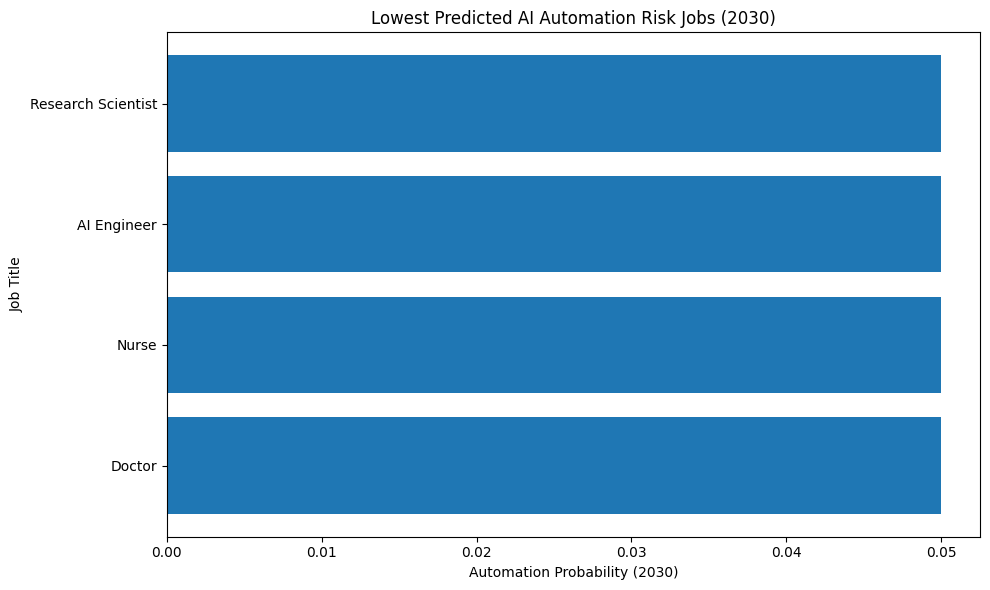

In [34]:
risk_col = "Automation_Probability_2030"
job_col = "Job_Title"

lowest = df[[job_col, risk_col]].sort_values(by=risk_col).head(10)

plt.figure(figsize=(10, 6))
plt.barh(lowest[job_col], lowest[risk_col])
plt.xlabel("Automation Probability (2030)")
plt.ylabel("Job Title")
plt.title("Lowest Predicted AI Automation Risk Jobs (2030)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Lastly we decided to compare jobs that are least and most likely to be taken by AI before 2030.

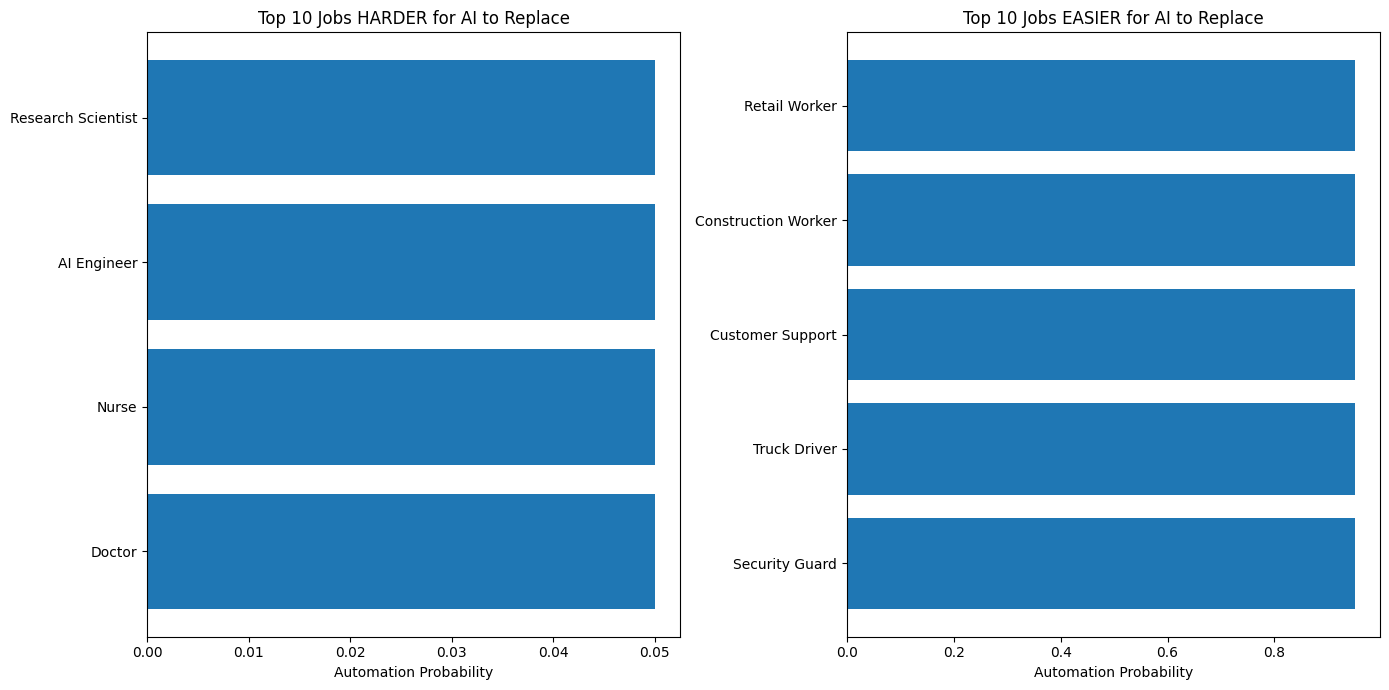

Top 10 HARDEST Jobs for AI to Replace:
               Job_Title  Automation_Probability_2030
1290  Research Scientist                         0.05
1     Research Scientist                         0.05
408          AI Engineer                         0.05
398                Nurse                         0.05
2744               Nurse                         0.05
566          AI Engineer                         0.05
2186              Doctor                         0.05
493   Research Scientist                         0.05
1468              Doctor                         0.05
1460               Nurse                         0.05

Top 10 EASIEST Jobs for AI to Replace:
                Job_Title  Automation_Probability_2030
2261        Retail Worker                         0.95
2292        Retail Worker                         0.95
2121  Construction Worker                         0.95
2933     Customer Support                         0.95
2138         Truck Driver                         0.

In [36]:
easiest = df.sort_values(by='Automation_Probability_2030', ascending=False).head(10)
hardest = df.sort_values(by='Automation_Probability_2030', ascending=True).head(10)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.barh(hardest['Job_Title'], hardest['Automation_Probability_2030'])
plt.title("Top 10 Jobs HARDER for AI to Replace")
plt.xlabel("Automation Probability")
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(easiest['Job_Title'], easiest['Automation_Probability_2030'])
plt.title("Top 10 Jobs EASIER for AI to Replace")
plt.xlabel("Automation Probability")
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

print("Top 10 HARDEST Jobs for AI to Replace:")
print(hardest[['Job_Title', 'Automation_Probability_2030']])

print("\nTop 10 EASIEST Jobs for AI to Replace:")
print(easiest[['Job_Title', 'Automation_Probability_2030']])